# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Read in clustering dataset, note that this one is still missing the aggregated weather data, but this can easily be added in later

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [5]:
df

,Bridge_ID,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21
0,2.12E+13,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]",...,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]"
1,CALHAN-8TH ST.,"[36.0, 97.0, 428, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.3, 97.0, 955, 1949, 2, 11.0, 7.0]","[36.3, 96.9, 955, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]",...,"[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 9.7, 7.3]","[36.3, 97.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 522, 1949, 2, 9.7, 7.3]"
2,CSG-C.80-07.65,"[36.0, 83.9, 417, 1970, 2, 6.6, 6.4]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.3, 76.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 69.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]",...,"[36.3, 62.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 717, 1970, 2, 6.6, 2.9]"
3,CSG-D.04-10.42,"[36.0, 82.0, 1836, 1955, 2, 7.6, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 83.4, 1459, 1955, 2, 7.7, 3.0]","[36.3, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]",...,"[36.3, 72.3, 1295, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 2696, 1955, 2, 7.7, 3.4]"
4,CSG-D.37-15.67,"[36.0, 97.0, 87, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]",...,"[36.3, 98.0, 397, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 99.0, 287, 1984, 2, 12.8, 3.0]","[36.3, 99.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 268, 1984, 2, 12.8, 3.0]"
...

# For the first row of the dataset, plot the sufficiency rating over time

In [6]:
first_row = df.iloc[1]

In [7]:
first_row = first_row.iloc[1:]

In [8]:
first_row

time_0     [36.0, 97.0, 428, 1949, 2, 10.9, 7.3]
time_1     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_2     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_3     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_4     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_5     [36.3, 97.0, 955, 1949, 2, 11.0, 7.0]
time_6     [36.3, 96.9, 955, 1949, 2, 11.0, 7.3]
time_7     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_8     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_9     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_10    [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_11    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_12    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_13    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_14    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_15     [36.3, 97.0, 422, 1949, 2, 9.7, 7.3]
time_16     [36.3, 97.0, 369, 1949, 2, 9.7, 7.3]
time_17     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_18     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_19     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_20     [36.3, 8

In [9]:
import re

non_decimal = re.compile(r'[^\d.]+')

list_of_row_components = []

for i, row in first_row.iteritems():
    current_row_components = row.split(', ')
    current_row_components_replaced = []
    
#     print(current_row_components)
    for idx, component in enumerate(current_row_components):
    #     print(first_row_components[idx])
        result = non_decimal.sub('', current_row_components[idx])
        current_row_components_replaced.append(float(result))
        
#     print(current_row_components_replaced)
    list_of_row_components.append(current_row_components_replaced)

In [10]:
first_row = df.iloc[1]

In [11]:
list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [12]:
first_row = first_row.iloc[1:]

In [13]:
sufficiency_rating_list = []

for row_component in list_of_row_components:
    sufficiency_rating_list.append(row_component[1])

In [14]:
sufficiency_rating_list

[97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0]

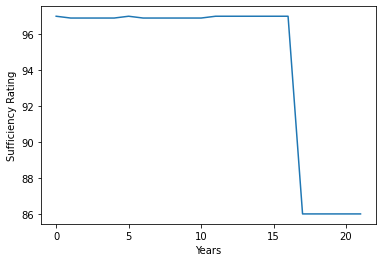

In [15]:
import matplotlib.pyplot as plt

plt.plot(sufficiency_rating_list)
plt.ylabel('Sufficiency Rating')
plt.xlabel('Years')
plt.show()


# Example of first training example

In [16]:
import pandas as pd

var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
varout = []

for element in list_of_row_components:
#     print(element)
    var1.append(element[0])
    var2.append(element[2])
    var3.append(element[3])
    var4.append(element[4])
    var5.append(element[5])
    var6.append(element[6])
    varout.append(element[1])
    
dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

df_temp = pd.DataFrame(dict_temp)

In [17]:
df_temp

,var1,var2,var3,var4,var5,var6,varout
0,36.0,428.0,1949.0,2.0,10.9,7.3,97.0
1,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
2,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
3,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
4,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
5,36.3,955.0,1949.0,2.0,11.0,7.0,97.0
6,36.3,955.0,1949.0,2.0,11.0,7.3,96.9
7,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
8,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
9,36.3,983.0,1949.0,2.0,11.0,7.3,96.9


# Convert each rows into it's own dataframe representing an individual time series example

In [18]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []

for i in range(1, 524):
    
    list_of_row_components = []
    
    current_row = df.iloc[i]
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    varout = []

    for element in list_of_row_components:

        var1.append(element[0])
        var2.append(element[2])
        var3.append(element[3])
        var4.append(element[4])
        var5.append(element[5])
        var6.append(element[6])
        varout.append(element[1])

    dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

    df_temp = pd.DataFrame(dict_temp)

    list_of_training_df.append(df_temp)

In [19]:
len(list_of_training_df)

523

In [20]:
list_of_training_df[7]

,var1,var2,var3,var4,var5,var6,varout
0,36.0,660.0,1970.0,2.0,11.2,2.4,96.9
1,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
2,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
3,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
4,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
5,36.3,950.0,1970.0,2.0,11.1,2.0,97.0
6,36.3,950.0,1970.0,2.0,11.1,2.4,96.9
7,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
8,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
9,36.3,700.0,1970.0,2.0,11.1,2.6,85.9


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

list_of_scaled_training_df = []
encoder = LabelEncoder()

scaler = MinMaxScaler(feature_range=(0, 1))

for training_df in list_of_training_df:
    temp_df = scaler.fit_transform(training_df)
    list_of_scaled_training_df.append(temp_df)

In [22]:
list_of_scaled_training_df[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

# Single example of a time series example for a single bridge

In [23]:
values = list_of_training_df[7].values

In [24]:
n_train_hours = 21
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 1, 6) (21,) (1, 1, 6) (1,)


# Confirm gpu is being used before training

In [25]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [26]:
get_available_gpus()

['/device:GPU:0']

# Build LSTM model

In [27]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     tf.keras.layers.LSTM(100, return_sequences=True),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [28]:
lstm_model.compile(loss='mse', optimizer='adam')

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run with min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2365 - val_loss: 1.6432e-04
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7741 - val_loss: 4.9046e-04
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4184 - val_loss: 0.0017
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2816 - val_loss: 0.9190
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.2534e-04 - val_loss: 4.0015e-05
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7856 - val_loss: 0.9105
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2361 - val_loss: 0.0018
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4222 - val_loss: 0.4296
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0455 - val_loss: 3.4760e-08
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3376 - val_loss: 0.6596
EPOCH: 11 OUT OF 10

EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4321 - val_loss: 0.6224
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1229 - val_loss: 0.0014
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1854 - val_loss: 0.2298
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0780 - val_loss: 0.0610
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2353 - val_loss: 0.0414
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0845 - val_loss: 0.0010
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1179 - val_loss: 0.2400
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2271 - val_loss: 0.2441
EPOCH: 94 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2013 - val_loss: 0.2495
EPOCH: 95 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3051 - val_loss: 0.3780
EPOCH: 96 OUT OF 1000
(21, 1, 

EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1782 - val_loss: 0.2100
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1092 - val_loss: 0.0564
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2708 - val_loss: 0.2598
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1339 - val_loss: 0.2671
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1649 - val_loss: 0.1664
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1703 - val_loss: 0.0586
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0500 - val_loss: 0.0497
EPOCH: 177 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1463 - val_loss: 0.2726
EPOCH: 178 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1154 - val_loss: 0.2588
EPOCH: 179 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0723 - val_loss: 0.1126
EPOCH: 180 OUT OF 10

EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0898 - val_loss: 0.0949
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2554 - val_loss: 0.3307
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0869 - val_loss: 0.1404
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0475 - val_loss: 0.0467
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2255 - val_loss: 0.2209
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2142 - val_loss: 0.2232
EPOCH: 260 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1868 - val_loss: 0.2979
EPOCH: 261 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1038 - val_loss: 0.0016
EPOCH: 262 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1723 - val_loss: 0.1583
EPOCH: 263 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2019 - val_loss: 0.0030
EPOCH: 264 OUT OF 10

1/1 - 0s - loss: 0.0474 - val_loss: 0.0670
EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2228 - val_loss: 0.1178
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0705 - val_loss: 0.0288
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2052 - val_loss: 0.2401
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1520 - val_loss: 0.1448
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2616 - val_loss: 0.2989
EPOCH: 343 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0997 - val_loss: 0.1331
EPOCH: 344 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1993 - val_loss: 0.2068
EPOCH: 345 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1251 - val_loss: 0.1632
EPOCH: 346 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0521 - val_loss: 0.0513
EPOCH: 347 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

1/1 - 0s - loss: 0.2927 - val_loss: 0.3439
EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1415 - val_loss: 0.1481
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0859 - val_loss: 0.0247
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1281 - val_loss: 0.3971
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1003 - val_loss: 0.1309
EPOCH: 426 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1748 - val_loss: 0.0695
EPOCH: 427 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1327 - val_loss: 0.0710
EPOCH: 428 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2020 - val_loss: 0.1888
EPOCH: 429 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0989 - val_loss: 0.0871
EPOCH: 430 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1541 - val_loss: 0.1383
EPOCH: 431 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

1/1 - 0s - loss: 0.2175 - val_loss: 0.1112
EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0921 - val_loss: 0.0806
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1113 - val_loss: 0.0462
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1190 - val_loss: 0.1097
EPOCH: 509 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3443 - val_loss: 0.3548
EPOCH: 510 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0985 - val_loss: 0.0042
EPOCH: 511 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2741 - val_loss: 0.1936
EPOCH: 512 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0906 - val_loss: 0.0629
EPOCH: 513 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0417 - val_loss: 8.2728e-06
EPOCH: 514 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4235 - val_loss: 0.4041
EPOCH: 515 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1144 - val_loss: 0.1144
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0862 - val_loss: 0.0599
EPOCH: 592 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1004 - val_loss: 0.0243
EPOCH: 593 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3002 - val_loss: 0.3275
EPOCH: 594 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2332 - val_loss: 0.6198
EPOCH: 595 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1723 - val_loss: 0.1073
EPOCH: 596 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1807 - val_loss: 0.1477
EPOCH: 597 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2768 - val_loss: 0.4490
EPOCH: 598 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2937 - val_loss: 0.3405
EPOCH: 599 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2949 - val_loss: 0.2193
EPOCH: 600 OUT OF 10

1/1 - 0s - loss: 0.2127 - val_loss: 0.0526
EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0956 - val_loss: 0.0907
EPOCH: 675 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0630 - val_loss: 0.1151
EPOCH: 676 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0435 - val_loss: 0.0353
EPOCH: 677 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5607 - val_loss: 0.5645
EPOCH: 678 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2024 - val_loss: 0.2893
EPOCH: 679 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2062 - val_loss: 0.0847
EPOCH: 680 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0478 - val_loss: 0.0104
EPOCH: 681 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0959 - val_loss: 0.0993
EPOCH: 682 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1494 - val_loss: 0.1515
EPOCH: 683 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2

1/1 - 0s - loss: 0.1052 - val_loss: 0.1043
EPOCH: 758 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1095 - val_loss: 0.1847
EPOCH: 759 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0448 - val_loss: 0.0642
EPOCH: 760 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0951 - val_loss: 0.0911
EPOCH: 761 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0441 - val_loss: 0.1754
EPOCH: 762 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0739 - val_loss: 0.0019
EPOCH: 763 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1054 - val_loss: 0.2433
EPOCH: 764 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0810 - val_loss: 0.0014
EPOCH: 765 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2516 - val_loss: 5.0997e-04
EPOCH: 766 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0723 - val_loss: 0.1352
EPOCH: 767 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

EPOCH: 842 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0865 - val_loss: 0.1152
EPOCH: 843 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1830 - val_loss: 0.1978
EPOCH: 844 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1016 - val_loss: 0.1014
EPOCH: 845 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0557 - val_loss: 0.0348
EPOCH: 846 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0234 - val_loss: 0.0072
EPOCH: 847 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2087 - val_loss: 0.3017
EPOCH: 848 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1492 - val_loss: 0.0166
EPOCH: 849 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0968 - val_loss: 0.0991
EPOCH: 850 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1200 - val_loss: 0.0570
EPOCH: 851 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1406 - val_loss: 0.0871
EPOCH: 852 OUT OF 10

EPOCH: 926 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1562 - val_loss: 0.0421
EPOCH: 927 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0761 - val_loss: 0.1239
EPOCH: 928 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0849 - val_loss: 0.0698
EPOCH: 929 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0715 - val_loss: 3.8936e-06
EPOCH: 930 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0831 - val_loss: 0.0629
EPOCH: 931 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1599 - val_loss: 0.4106
EPOCH: 932 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0343 - val_loss: 0.0660
EPOCH: 933 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2494 - val_loss: 0.6292
EPOCH: 934 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1700 - val_loss: 0.1028
EPOCH: 935 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2785 - val_loss: 0.0622
EPOCH: 936 OUT O

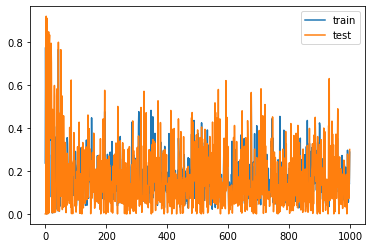

In [29]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_scaled_training_df[rand_int]

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    lstm_model.reset_states()
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [30]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [31]:
rmse

79.71721062815779

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run without min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8197.9453 - val_loss: 8109.1431
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8511.2080 - val_loss: 8787.5850
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5886.8491 - val_loss: 6622.9907
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7238.7246 - val_loss: 7366.7891
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8968.0811 - val_loss: 8956.3193
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9659.4463 - val_loss: 9676.1123
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5237.1753 - val_loss: 5226.1201
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7529.3506 - val_loss: 4045.0676
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6320.1846 - val_loss: 6308.9639
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7988.9927 -

EPOCH: 81 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8940.7080 - val_loss: 9225.2510
EPOCH: 82 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3316.1213 - val_loss: 3028.7224
EPOCH: 83 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9090.6299 - val_loss: 8879.5557
EPOCH: 84 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9532.0889 - val_loss: 9664.1660
EPOCH: 85 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8936.8457 - val_loss: 9563.2256
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8925.2529 - val_loss: 9054.0400
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6816.1460 - val_loss: 6866.1084
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3499.3928 - val_loss: 3541.7617
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2334.1172 - val_loss: 2330.9558
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 62

EPOCH: 160 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9062.1426 - val_loss: 9074.5117
EPOCH: 161 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7282.7085 - val_loss: 8486.3115
EPOCH: 162 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3138.3721 - val_loss: 3134.7961
EPOCH: 163 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8591.8018 - val_loss: 9208.6465
EPOCH: 164 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4274.4712 - val_loss: 3562.5176
EPOCH: 165 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4093.5796 - val_loss: 2208.6013
EPOCH: 166 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5089.8999 - val_loss: 4965.2588
EPOCH: 167 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1729.5033 - val_loss: 40.3136
EPOCH: 168 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7133.2632 - val_loss: 7127.3906
EPOCH: 169 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

EPOCH: 239 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4187.4858 - val_loss: 4183.6348
EPOCH: 240 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8071.8867 - val_loss: 8057.6016
EPOCH: 241 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8057.6167 - val_loss: 8051.0205
EPOCH: 242 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5948.7319 - val_loss: 5983.4932
EPOCH: 243 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1328.3440 - val_loss: 1040.7904
EPOCH: 244 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6366.6929 - val_loss: 5666.7017
EPOCH: 245 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6167.6128 - val_loss: 6166.0371
EPOCH: 246 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6264.4585 - val_loss: 5702.3193
EPOCH: 247 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7997.0254 - val_loss: 8021.2583
EPOCH: 248 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 318 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6411.4204 - val_loss: 6369.9194
EPOCH: 319 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5513.5913 - val_loss: 7522.1294
EPOCH: 320 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7603.1978 - val_loss: 7630.9805
EPOCH: 321 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4034.6533 - val_loss: 4179.7964
EPOCH: 322 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3152.1606 - val_loss: 2959.0862
EPOCH: 323 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8160.7666 - val_loss: 8333.4795
EPOCH: 324 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7051.7666 - val_loss: 6727.1523
EPOCH: 325 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8516.0371 - val_loss: 8487.0381
EPOCH: 326 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6709.1772 - val_loss: 7602.5010
EPOCH: 327 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 397 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1254.9578 - val_loss: 1218.9603
EPOCH: 398 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6539.1431 - val_loss: 7168.9287
EPOCH: 399 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5223.0303 - val_loss: 5276.9331
EPOCH: 400 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2745.7590 - val_loss: 2616.0654
EPOCH: 401 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3618.3474 - val_loss: 3615.6514
EPOCH: 402 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6941.1929 - val_loss: 7134.2803
EPOCH: 403 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5551.4634 - val_loss: 8262.4756
EPOCH: 404 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6301.7275 - val_loss: 6282.8955
EPOCH: 405 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5102.0229 - val_loss: 5184.4922
EPOCH: 406 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 476 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3018.3889 - val_loss: 3729.1748
EPOCH: 477 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1379.0483 - val_loss: 0.2698
EPOCH: 478 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 925.5982 - val_loss: 1056.2133
EPOCH: 479 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7189.5981 - val_loss: 7088.7300
EPOCH: 480 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5397.6577 - val_loss: 4995.9019
EPOCH: 481 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5807.7305 - val_loss: 5924.1440
EPOCH: 482 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7148.9561 - val_loss: 6732.1655
EPOCH: 483 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2812.1042 - val_loss: 2750.0886
EPOCH: 484 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2444.1514 - val_loss: 2433.2632
EPOCH: 485 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - lo

EPOCH: 555 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7618.4834 - val_loss: 7921.6152
EPOCH: 556 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5177.2246 - val_loss: 5254.5464
EPOCH: 557 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5012.5522 - val_loss: 2206.8054
EPOCH: 558 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4325.0269 - val_loss: 5149.2495
EPOCH: 559 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1295.0564 - val_loss: 1.5768
EPOCH: 560 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5947.1680 - val_loss: 6546.0557
EPOCH: 561 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5139.4053 - val_loss: 5143.1895
EPOCH: 562 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6402.6587 - val_loss: 5989.4492
EPOCH: 563 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7173.9712 - val_loss: 7171.8501
EPOCH: 564 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - l

EPOCH: 634 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2639.3152 - val_loss: 2636.8508
EPOCH: 635 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5739.2344 - val_loss: 5362.5317
EPOCH: 636 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1367.9103 - val_loss: 667.4418
EPOCH: 637 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6287.0400 - val_loss: 6243.1821
EPOCH: 638 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5044.5791 - val_loss: 3498.4387
EPOCH: 639 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6030.4546 - val_loss: 4569.0215
EPOCH: 640 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4335.3862 - val_loss: 4333.1353
EPOCH: 641 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5911.4443 - val_loss: 4538.6670
EPOCH: 642 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1737.5443 - val_loss: 1788.2222
EPOCH: 643 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s -

EPOCH: 713 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3245.9189 - val_loss: 3587.1448
EPOCH: 714 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6020.4785 - val_loss: 5636.5210
EPOCH: 715 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4448.4595 - val_loss: 5830.9697
EPOCH: 716 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1485.8890 - val_loss: 1152.0756
EPOCH: 717 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4328.8960 - val_loss: 4628.1201
EPOCH: 718 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4820.2275 - val_loss: 4818.4224
EPOCH: 719 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5486.3301 - val_loss: 5316.1089
EPOCH: 720 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6023.5679 - val_loss: 6020.0049
EPOCH: 721 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4540.0054 - val_loss: 4067.3643
EPOCH: 722 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 792 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5588.0884 - val_loss: 5527.3970
EPOCH: 793 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5278.1167 - val_loss: 4996.1577
EPOCH: 794 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5494.6357 - val_loss: 5461.0874
EPOCH: 795 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1831.8789 - val_loss: 1636.5414
EPOCH: 796 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2946.5020 - val_loss: 2770.9490
EPOCH: 797 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3832.0754 - val_loss: 3275.5310
EPOCH: 798 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4489.2729 - val_loss: 4530.7500
EPOCH: 799 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2777.8113 - val_loss: 2012.6709
EPOCH: 800 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3836.5127 - val_loss: 6239.9282
EPOCH: 801 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 871 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5381.8760 - val_loss: 5434.4990
EPOCH: 872 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2477.0435 - val_loss: 1396.3489
EPOCH: 873 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2504.5754 - val_loss: 2545.4302
EPOCH: 874 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5436.8223 - val_loss: 5412.8223
EPOCH: 875 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5318.2876 - val_loss: 5468.8403
EPOCH: 876 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4127.9585 - val_loss: 4160.8442
EPOCH: 877 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3311.1145 - val_loss: 3685.5688
EPOCH: 878 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2129.0984 - val_loss: 1322.9852
EPOCH: 879 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3207.6558 - val_loss: 3173.1653
EPOCH: 880 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 950 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1384.3975 - val_loss: 1513.8323
EPOCH: 951 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3443.0767 - val_loss: 2914.5254
EPOCH: 952 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5252.9907 - val_loss: 5318.8774
EPOCH: 953 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5265.5952 - val_loss: 5262.2651
EPOCH: 954 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 926.1655 - val_loss: 1001.1754
EPOCH: 955 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5478.6978 - val_loss: 6134.7910
EPOCH: 956 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4147.1235 - val_loss: 4144.2290
EPOCH: 957 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3482.0269 - val_loss: 3797.7954
EPOCH: 958 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3768.9438 - val_loss: 3766.9014
EPOCH: 959 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s -

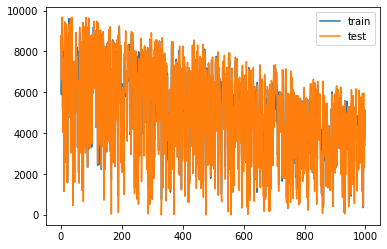

In [32]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [33]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [34]:
rmse

57.81395543331846

In [35]:
predicted

[21.331879,
 21.331879,
 28.135601,
 22.39915,
 24.369858,
 24.369858,
 28.13556,
 22.398853,
 28.454514,
 28.454514,
 21.331879,
 24.369858,
 28.454514,
 28.454514,
 28.45451,
 21.331879,
 21.331879,
 28.454514,
 24.369858,
 28.45451,
 28.454514,
 23.301289,
 24.369858,
 21.331879,
 21.331879,
 28.454514,
 28.454514,
 21.331879,
 28.454514,
 21.331879,
 21.331879,
 28.454514,
 25.309406,
 28.454514,
 21.331879,
 25.309387,
 22.399147,
 21.331879,
 28.454514,
 21.331879,
 21.331879,
 21.331879,
 21.331879,
 21.331879,
 21.331879,
 28.454514,
 28.13556,
 23.354588,
 28.13556,
 21.331879,
 28.13556,
 21.331879,
 22.399162,
 21.331879,
 28.454514,
 21.331879,
 21.331879,
 21.331879,
 28.454514,
 24.369858,
 21.331879,
 28.454514,
 19.276615,
 21.331879,
 28.13556,
 28.454514,
 21.331879,
 24.369858,
 28.454514,
 25.309422,
 25.309422,
 28.45451,
 28.454514,
 19.276615,
 28.13556,
 21.331879,
 21.331879,
 21.331879,
 28.13556,
 28.454514,
 28.454514,
 28.454514,
 24.369858,
 21.331879,
 26

In [36]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [37]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
#     list_of_row_components = []
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
#     print(bridge_id)
#     print(current_row)
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []
        
#         current_row_components_replaced.append(bridge_id)

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
#             print(result)
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# bridge_ids = []
# var1 = []
# var2 = []
# var3 = []
# var4 = []
# var5 = []
# var6 = []
# varout = []

# for element in list_of_row_components:

#     bridge_ids.append(element[0])
#     var1.append(float(element[1]))
#     var2.append(float(element[2]))
#     var3.append(float(element[3]))
#     var4.append(float(element[5]))
#     var5.append(float(element[6]))
#     var6.append(float(element[7]))
#     varout.append(float(element[2]))

# # dict_temp = {'bridge_id':bridge_ids, 'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}
# dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

# df_temp = pd.DataFrame(dict_temp)

# list_of_training_df.append(df_temp)

In [38]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float( list_of_row_components[idx][i])

In [39]:
import numpy as np

# list_of_row_components = np.array(list_of_row_components)

list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [40]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


In [41]:
len(list_of_row_components)

11506

In [42]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Build LSTM model

In [43]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     tf.keras.layers.LSTM(100, return_sequences=True),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [44]:
lstm_model.compile(loss='mse', optimizer='adam')

In [45]:
list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

In [46]:
len(list_of_examples)

522

In [47]:
list_of_examples[0]

array([[  36. ,    7.3,  428. , 1949. ,    2. ,   10.9,   97. ],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36. ,    7.3,  955. , 1949. ,    2. ,   10.9,   96.9],
       [  36.3,    7. ,  955. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  955. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  983. , 1949. ,    2. ,   11. ,   96.9],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  422. , 1949. ,    2. ,   11. ,   97. ],
       [  36.3,    7.3,  

In [48]:
for idx, example in enumerate(list_of_examples):
#     print('here')
    print(list_of_examples[idx][21][6])
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

86.0
55.7
50.2
100.0
70.9
71.7
98.9
65.9
79.5
97.6
49.5
66.2
19.9
99.0
81.3
90.6
58.8
98.0
89.5
95.4
84.0
100.0
78.9
83.4
95.8
98.0
99.9
75.3
82.0
62.7
81.7
71.2
84.0
99.0
40.6
98.9
97.7
73.0
69.4
74.0
61.9
43.5
98.9
51.2
95.6
92.0
91.9
47.8
83.4
97.8
99.9
96.7
47.9
79.7
95.8
96.8
87.6
92.0
63.9
97.4
71.4
92.0
99.9
98.9
78.4
84.2
91.7
55.2
95.3
34.0
93.4
63.1
95.1
39.5
97.3
63.9
87.3
71.4
87.6
58.3
71.6
97.0
63.7
78.7
23.3
79.2
97.9
89.6
89.6
78.0
11.0
96.0
93.1
94.1
94.8
63.2
97.3
90.0
96.7
80.9
97.0
90.7
94.9
95.4
76.4
83.5
75.8
95.8
87.0
91.1
63.8
96.9
44.5
81.5
96.9
81.8
49.4
81.3
96.8
96.7
95.0
97.9
57.3
56.1
93.1
88.1
97.0
59.4
93.8
90.5
84.0
69.1
66.3
98.8
99.8
99.0
98.7
97.0
85.9
98.3
99.2
62.2
73.5
99.9
95.8
97.2
84.1
100.0
74.8
77.4
100.0
88.9
100.0
100.0
98.1
98.3
92.8
96.9
78.9
55.3
54.3
98.1
91.2
95.1
67.1
98.0
97.0
100.0
99.6
74.8
98.9
100.0
100.0
79.3
87.2
96.4
74.8
99.1
99.3
91.6
99.8
58.5
92.9
55.3
100.0
88.9
47.1
81.4
100.0
100.0
96.9
95.4
99.9
99.9
99.8
100.0
96.8
92

In [49]:
list_of_examples.shape

(522, 22, 7)

In [50]:
list_of_examples.astype(np.float)

array([[[3.6000e+01, 7.3000e+00, 4.2800e+02, ..., 2.0000e+00,
         1.0900e+01, 9.7000e+01],
        [3.6000e+01, 7.3000e+00, 9.5500e+02, ..., 2.0000e+00,
         1.0900e+01, 9.6900e+01],
        [3.6000e+01, 7.3000e+00, 9.5500e+02, ..., 2.0000e+00,
         1.0900e+01, 9.6900e+01],
        ...,
        [3.6300e+01, 7.3000e+00, 3.6900e+02, ..., 2.0000e+00,
         9.7000e+00, 8.6000e+01],
        [3.6300e+01, 7.3000e+00, 3.6900e+02, ..., 2.0000e+00,
         9.7000e+00, 8.6000e+01],
        [8.6000e+01, 8.6000e+01, 8.6000e+01, ..., 8.6000e+01,
         8.6000e+01, 8.6000e+01]],

       [[3.6000e+01, 6.4000e+00, 4.1700e+02, ..., 2.0000e+00,
         6.6000e+00, 8.3900e+01],
        [3.6000e+01, 3.0000e+00, 3.5100e+02, ..., 2.0000e+00,
         6.6000e+00, 7.0900e+01],
        [3.6000e+01, 3.0000e+00, 3.5100e+02, ..., 2.0000e+00,
         6.6000e+00, 7.0900e+01],
        ...,
        [3.2700e+01, 2.9000e+00, 6.2300e+02, ..., 2.0000e+00,
         6.6000e+00, 5.5700e+01],
        [3.2

In [51]:
list_of_examples[0][21]

array([86., 86., 86., 86., 86., 86., 86.])

In [52]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [53]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


In [54]:
train_y[0]

86.0

In [107]:
train_X[200]

array([[2.800e+01, 5.350e+02, 1.990e+03, 2.000e+00, 1.230e+01, 9.990e+01],
       [2.800e+01, 2.218e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.950e+01],
       [2.800e+01, 2.218e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.950e+01],
       [2.800e+01, 2.218e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.950e+01],
       [2.710e+01, 2.218e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.950e+01],
       [2.700e+01, 2.218e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.950e+01],
       [2.710e+01, 2.218e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.950e+01],
       [2.710e+01, 3.713e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.910e+01],
       [2.710e+01, 3.713e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.910e+01],
       [2.710e+01, 3.713e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.910e+01],
       [2.710e+01, 3.713e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.910e+01],
       [2.710e+01, 3.713e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.910e+01],
       [2.710e+01, 3.713e+03, 1.990e+03, 2.000e+00, 1.230e+01, 9.910e+01],
       [2.710e+01, 3.371e

In [108]:
train_X[0][0].shape

(6,)

In [109]:
test_X[30]

array([[1.4600e+01, 1.0550e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        5.8200e+01],
       [1.4600e+01, 1.3464e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        5.7700e+01],
       [1.4600e+01, 1.3464e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        5.7700e+01],
       [1.4600e+01, 1.3464e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        5.7700e+01],
       [1.4600e+01, 1.3857e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        5.7600e+01],
       [1.5000e+01, 1.3857e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        4.5400e+01],
       [1.5000e+01, 1.3857e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        4.5400e+01],
       [1.5000e+01, 1.2767e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        4.5600e+01],
       [1.4500e+01, 1.2767e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        4.5600e+01],
       [1.4500e+01, 1.3750e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        4.5400e+01],
       [1.4500e+01, 1.3750e+04, 1.9310e+03, 2.0000e+00, 9.1000e+00,
        4.5400e+01],
       [1.4700e+01, 2

# Build LSTM model

In [143]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2, input_shape=(train_X.shape[1], train_X.shape[2])),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [144]:
lstm_model.compile(loss='mae', optimizer='adam')

In [145]:
history = lstm_model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/1000
5/5 - 0s - loss: 82.3491 - val_loss: 76.0591
Epoch 2/1000
5/5 - 0s - loss: 81.8622 - val_loss: 75.6672
Epoch 3/1000
5/5 - 0s - loss: 81.3985 - val_loss: 75.2834
Epoch 4/1000
5/5 - 0s - loss: 80.9772 - val_loss: 74.8738
Epoch 5/1000
5/5 - 0s - loss: 80.4692 - val_loss: 74.3910
Epoch 6/1000
5/5 - 0s - loss: 80.0571 - val_loss: 73.9313
Epoch 7/1000
5/5 - 0s - loss: 79.4469 - val_loss: 73.3435
Epoch 8/1000
5/5 - 0s - loss: 78.7353 - val_loss: 72.6187
Epoch 9/1000
5/5 - 0s - loss: 77.9752 - val_loss: 71.8518
Epoch 10/1000
5/5 - 0s - loss: 77.1535 - val_loss: 71.1017
Epoch 11/1000
5/5 - 0s - loss: 76.1665 - val_loss: 69.7630
Epoch 12/1000
5/5 - 0s - loss: 75.0166 - val_loss: 68.4342
Epoch 13/1000
5/5 - 0s - loss: 73.6643 - val_loss: 66.7211
Epoch 14/1000
5/5 - 0s - loss: 71.8561 - val_loss: 65.4150
Epoch 15/1000
5/5 - 0s - loss: 69.9034 - val_loss: 63.9877
Epoch 16/1000
5/5 - 0s - loss: 67.9349 - val_loss: 62.1610
Epoch 17/1000
5/5 - 0s - loss: 65.9075 - val_loss: 60.4708
Epoch 

Epoch 140/1000
5/5 - 0s - loss: 13.2502 - val_loss: 16.3803
Epoch 141/1000
5/5 - 0s - loss: 12.8973 - val_loss: 16.5078
Epoch 142/1000
5/5 - 0s - loss: 12.5306 - val_loss: 17.2089
Epoch 143/1000
5/5 - 0s - loss: 12.5093 - val_loss: 17.1127
Epoch 144/1000
5/5 - 0s - loss: 12.4208 - val_loss: 17.1225
Epoch 145/1000
5/5 - 0s - loss: 12.4931 - val_loss: 17.0723
Epoch 146/1000
5/5 - 0s - loss: 12.6584 - val_loss: 17.1014
Epoch 147/1000
5/5 - 0s - loss: 12.5922 - val_loss: 16.9267
Epoch 148/1000
5/5 - 0s - loss: 12.2842 - val_loss: 16.5254
Epoch 149/1000
5/5 - 0s - loss: 12.6678 - val_loss: 16.4614
Epoch 150/1000
5/5 - 0s - loss: 12.1200 - val_loss: 16.4200
Epoch 151/1000
5/5 - 0s - loss: 12.7013 - val_loss: 15.9442
Epoch 152/1000
5/5 - 0s - loss: 12.9918 - val_loss: 16.2369
Epoch 153/1000
5/5 - 0s - loss: 12.3913 - val_loss: 16.2679
Epoch 154/1000
5/5 - 0s - loss: 13.1231 - val_loss: 16.3282
Epoch 155/1000
5/5 - 0s - loss: 13.1561 - val_loss: 16.3989
Epoch 156/1000
5/5 - 0s - loss: 13.3194 

Epoch 277/1000
5/5 - 0s - loss: 12.4135 - val_loss: 15.6081
Epoch 278/1000
5/5 - 0s - loss: 12.4146 - val_loss: 15.7671
Epoch 279/1000
5/5 - 0s - loss: 12.1116 - val_loss: 15.6365
Epoch 280/1000
5/5 - 0s - loss: 12.6619 - val_loss: 15.5278
Epoch 281/1000
5/5 - 0s - loss: 12.2818 - val_loss: 15.4906
Epoch 282/1000
5/5 - 0s - loss: 12.3360 - val_loss: 15.5048
Epoch 283/1000
5/5 - 0s - loss: 11.8633 - val_loss: 15.4027
Epoch 284/1000
5/5 - 0s - loss: 12.3684 - val_loss: 15.3064
Epoch 285/1000
5/5 - 0s - loss: 12.1822 - val_loss: 15.3511
Epoch 286/1000
5/5 - 0s - loss: 12.2944 - val_loss: 15.6360
Epoch 287/1000
5/5 - 0s - loss: 12.0741 - val_loss: 15.7976
Epoch 288/1000
5/5 - 0s - loss: 12.1229 - val_loss: 15.8318
Epoch 289/1000
5/5 - 0s - loss: 12.0147 - val_loss: 15.7908
Epoch 290/1000
5/5 - 0s - loss: 12.2653 - val_loss: 15.6704
Epoch 291/1000
5/5 - 0s - loss: 12.1233 - val_loss: 15.5595
Epoch 292/1000
5/5 - 0s - loss: 12.0211 - val_loss: 15.0665
Epoch 293/1000
5/5 - 0s - loss: 12.6360 

Epoch 414/1000
5/5 - 0s - loss: 10.9227 - val_loss: 13.5921
Epoch 415/1000
5/5 - 0s - loss: 12.1085 - val_loss: 13.4786
Epoch 416/1000
5/5 - 0s - loss: 11.6201 - val_loss: 13.9571
Epoch 417/1000
5/5 - 0s - loss: 11.8977 - val_loss: 13.4273
Epoch 418/1000
5/5 - 0s - loss: 11.0082 - val_loss: 12.3737
Epoch 419/1000
5/5 - 0s - loss: 11.3740 - val_loss: 16.2344
Epoch 420/1000
5/5 - 0s - loss: 11.0870 - val_loss: 12.6874
Epoch 421/1000
5/5 - 0s - loss: 11.3342 - val_loss: 13.7784
Epoch 422/1000
5/5 - 0s - loss: 11.4602 - val_loss: 14.1934
Epoch 423/1000
5/5 - 0s - loss: 11.1006 - val_loss: 14.2815
Epoch 424/1000
5/5 - 0s - loss: 11.2277 - val_loss: 14.1392
Epoch 425/1000
5/5 - 0s - loss: 11.0669 - val_loss: 14.1744
Epoch 426/1000
5/5 - 0s - loss: 10.5403 - val_loss: 13.8036
Epoch 427/1000
5/5 - 0s - loss: 10.6416 - val_loss: 12.0521
Epoch 428/1000
5/5 - 0s - loss: 10.5064 - val_loss: 12.4778
Epoch 429/1000
5/5 - 0s - loss: 10.6768 - val_loss: 13.4629
Epoch 430/1000
5/5 - 0s - loss: 11.0876 

Epoch 551/1000
5/5 - 0s - loss: 11.5158 - val_loss: 14.6380
Epoch 552/1000
5/5 - 0s - loss: 10.9438 - val_loss: 14.6274
Epoch 553/1000
5/5 - 0s - loss: 10.4649 - val_loss: 14.5693
Epoch 554/1000
5/5 - 0s - loss: 10.4936 - val_loss: 14.5090
Epoch 555/1000
5/5 - 0s - loss: 10.7775 - val_loss: 14.5091
Epoch 556/1000
5/5 - 0s - loss: 11.0815 - val_loss: 14.4628
Epoch 557/1000
5/5 - 0s - loss: 11.3675 - val_loss: 14.4347
Epoch 558/1000
5/5 - 0s - loss: 11.4582 - val_loss: 14.4513
Epoch 559/1000
5/5 - 0s - loss: 11.3214 - val_loss: 14.4321
Epoch 560/1000
5/5 - 0s - loss: 10.8928 - val_loss: 14.4513
Epoch 561/1000
5/5 - 0s - loss: 11.3136 - val_loss: 14.5852
Epoch 562/1000
5/5 - 0s - loss: 11.5274 - val_loss: 14.7189
Epoch 563/1000
5/5 - 0s - loss: 11.3633 - val_loss: 14.4374
Epoch 564/1000
5/5 - 0s - loss: 11.1898 - val_loss: 14.4971
Epoch 565/1000
5/5 - 0s - loss: 11.3229 - val_loss: 14.8380
Epoch 566/1000
5/5 - 0s - loss: 11.7999 - val_loss: 14.8815
Epoch 567/1000
5/5 - 0s - loss: 11.4684 

Epoch 688/1000
5/5 - 0s - loss: 11.4100 - val_loss: 13.5170
Epoch 689/1000
5/5 - 0s - loss: 10.8576 - val_loss: 14.0448
Epoch 690/1000
5/5 - 0s - loss: 10.5605 - val_loss: 14.3501
Epoch 691/1000
5/5 - 0s - loss: 10.9091 - val_loss: 14.4116
Epoch 692/1000
5/5 - 0s - loss: 11.2271 - val_loss: 14.4688
Epoch 693/1000
5/5 - 0s - loss: 10.9785 - val_loss: 14.5407
Epoch 694/1000
5/5 - 0s - loss: 10.3221 - val_loss: 14.4284
Epoch 695/1000
5/5 - 0s - loss: 11.2119 - val_loss: 14.4238
Epoch 696/1000
5/5 - 0s - loss: 10.4567 - val_loss: 14.5033
Epoch 697/1000
5/5 - 0s - loss: 10.7766 - val_loss: 14.4019
Epoch 698/1000
5/5 - 0s - loss: 10.4677 - val_loss: 14.7482
Epoch 699/1000
5/5 - 0s - loss: 10.3637 - val_loss: 14.0618
Epoch 700/1000
5/5 - 0s - loss: 11.1258 - val_loss: 12.6754
Epoch 701/1000
5/5 - 0s - loss: 11.2102 - val_loss: 15.7503
Epoch 702/1000
5/5 - 0s - loss: 11.3264 - val_loss: 15.5775
Epoch 703/1000
5/5 - 0s - loss: 11.2468 - val_loss: 15.3164
Epoch 704/1000
5/5 - 0s - loss: 10.6551 

Epoch 825/1000
5/5 - 0s - loss: 11.1451 - val_loss: 13.7725
Epoch 826/1000
5/5 - 0s - loss: 11.4748 - val_loss: 13.8964
Epoch 827/1000
5/5 - 0s - loss: 11.3407 - val_loss: 14.0759
Epoch 828/1000
5/5 - 0s - loss: 10.6524 - val_loss: 14.1075
Epoch 829/1000
5/5 - 0s - loss: 11.2764 - val_loss: 14.1463
Epoch 830/1000
5/5 - 0s - loss: 10.8591 - val_loss: 14.2504
Epoch 831/1000
5/5 - 0s - loss: 11.0464 - val_loss: 14.3468
Epoch 832/1000
5/5 - 0s - loss: 11.1542 - val_loss: 14.2854
Epoch 833/1000
5/5 - 0s - loss: 10.1237 - val_loss: 13.9854
Epoch 834/1000
5/5 - 0s - loss: 10.2592 - val_loss: 14.0926
Epoch 835/1000
5/5 - 0s - loss: 10.7001 - val_loss: 14.2550
Epoch 836/1000
5/5 - 0s - loss: 10.5793 - val_loss: 14.6244
Epoch 837/1000
5/5 - 0s - loss: 10.6157 - val_loss: 14.1828
Epoch 838/1000
5/5 - 0s - loss: 11.0206 - val_loss: 13.8951
Epoch 839/1000
5/5 - 0s - loss: 10.5867 - val_loss: 13.7682
Epoch 840/1000
5/5 - 0s - loss: 10.2678 - val_loss: 13.8931
Epoch 841/1000
5/5 - 0s - loss: 11.1337 

Epoch 962/1000
5/5 - 0s - loss: 10.8374 - val_loss: 13.5489
Epoch 963/1000
5/5 - 0s - loss: 11.1518 - val_loss: 13.4760
Epoch 964/1000
5/5 - 0s - loss: 11.0374 - val_loss: 13.5550
Epoch 965/1000
5/5 - 0s - loss: 10.7490 - val_loss: 13.7031
Epoch 966/1000
5/5 - 0s - loss: 10.9532 - val_loss: 13.7236
Epoch 967/1000
5/5 - 0s - loss: 11.1228 - val_loss: 13.6785
Epoch 968/1000
5/5 - 0s - loss: 10.9286 - val_loss: 13.6293
Epoch 969/1000
5/5 - 0s - loss: 10.9300 - val_loss: 13.6177
Epoch 970/1000
5/5 - 0s - loss: 11.0304 - val_loss: 13.6837
Epoch 971/1000
5/5 - 0s - loss: 11.0492 - val_loss: 13.6298
Epoch 972/1000
5/5 - 0s - loss: 11.0741 - val_loss: 13.6224
Epoch 973/1000
5/5 - 0s - loss: 10.7854 - val_loss: 13.5526
Epoch 974/1000
5/5 - 0s - loss: 11.0050 - val_loss: 13.5640
Epoch 975/1000
5/5 - 0s - loss: 10.7270 - val_loss: 13.5623
Epoch 976/1000
5/5 - 0s - loss: 10.1656 - val_loss: 13.5494
Epoch 977/1000
5/5 - 0s - loss: 10.3347 - val_loss: 13.5681
Epoch 978/1000
5/5 - 0s - loss: 10.7554 

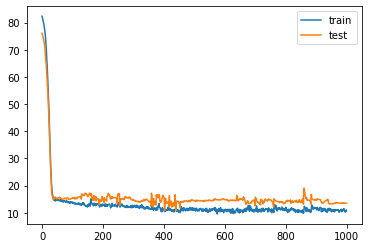

In [146]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [147]:
from sklearn.metrics import mean_squared_error

yhat = lstm_model.predict(test_X)
mse = mean_squared_error(test_y, yhat)
rmse = math.sqrt(mse)

In [148]:
rmse

18.466341842349166

# will need to plot loss and val_loss, figure out model predict error, as well as train the model for longer to reduce loss